In [1]:
# Import modules

%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

import matplotlib.animation as animation

default_dir = os.path.dirname(os.getcwd())
os.chdir(default_dir)

import RLConn as rc
from RLConn import problem_definitions as problems

C:\Users\Jimin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jimin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jimin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jimin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

C:\Users\Jimin\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jimin\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jimin\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jimin\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

## Import ground truth modes

In [2]:
m1_gt = rc.neural_params.m1_gt
m2_gt = rc.neural_params.m2_gt

(-45, 45)

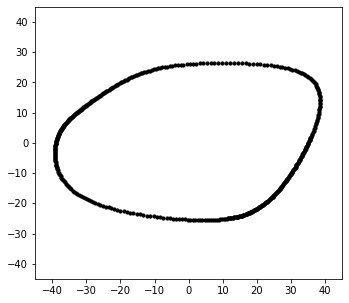

In [3]:
plt.figure(figsize=(5.5,5))

plt.scatter(m1_gt, m2_gt, s = 10, color = 'black')
plt.ylim(-45, 45)
plt.xlim(-45, 45)

## Define problem statement params and DQN params

In [4]:
Gg_noise = np.random.randint(-2, 2, (3,3))
Gg_noise = (Gg_noise + Gg_noise.T)/2
Gg_noise = Gg_noise.astype('int')
np.fill_diagonal(Gg_noise, 0)

Gs_noise = np.random.randint(-2, 2, (3,3))
np.fill_diagonal(Gs_noise, 0)

Gg_groundtruth = np.array([[0, 8, 5],
               [8, 0, 2],
               [5, 2, 0]])

Gg_noised = Gg_groundtruth + Gg_noise
Gg_noised[Gg_noised < 0] = 0

assert np.sum(Gg_noised == Gg_noised.T) == 9
assert np.diag(Gg_noised).sum() == 0

Gs_groundtruth = np.array([[0, 2, 8],
               [7, 0, 3],
               [7, 7, 0]])

Gs_noised = Gs_groundtruth + Gs_noise
Gs_noised[Gs_noised < 0] = 0

assert np.diag(Gs_noised).sum() == 0

E = np.array([1, 0, 0])

In [5]:
network_dict_init = {
    
    "gap": Gg_noised,
    "syn": Gs_noised,
    "directionality": E
}


external_params_dict = {

"input_vec" : [0, 0.03, 0],
"ablation_mask" : np.ones(3),
"tf" : 10,
"t_delta" : 0.01,
"cutoff_1" : 400,
"cutoff_2" : 900
    
}

# Feel free to change the params

batchsize = 3
num_epochs = 10000
err_threshold = 10
weight_min = 0
weight_max = 8
plotting_period = 1000 * (3*(3-1)/2)

## Training

In [ ]:
# Train

training_result = rc.network_sim.train_network(network_dict_init, external_params_dict, m1_gt, m2_gt,
                    batchsize = batchsize, num_epochs = num_epochs, err_threshold = err_threshold, 
                    weight_min = weight_min, weight_max = weight_max, plotting_period = plotting_period)

In [ ]:
# Display results
Gg_trained = training_result['Gg_list'][your best index]
Gs_trained = training_result['Gs_list'][your best index]
E = training_result['E']

mean_error, sum_error = rc.utils.compute_score(Gg_trained, Gs_trained, E, 
                    input_vec, external_params_dict['ablation_mask'], 
                    external_params_dict['tf'], external_params_dict['t_delta'], 
                       external_params_dict['cutoff_1'], external_params_dict['cutoff_2'],
                    m1_target = m1_gt,
                    m2_target = m2_gt,
                    plot_result = True,
                    verbose = True)